In [1]:
import glob
import itertools
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from astropy import units as u 
from astropy.coordinates import SkyCoord
from gammapy.stats import WStatCountsStatistic
from magicctapipe.utils import (
    get_dl2_mean,
    check_tel_combination,
    calculate_angular_distance,
)

In [2]:
# Display all columns of a pandas data frame:
pd.set_option('display.max_columns', None)

# Customize the pyplot figure:
plt.rcParams.update({
    'figure.figsize': (12, 9),
    'font.size': 15,
    'grid.linestyle': 'dotted',
})

# Get the pyplot default color cycle:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load DL2 data

### Load input files and apply quality cuts:

In [3]:
# ================
# === Settings ===
# ================

# data_mask = '/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/' \
#             '4.dl1_stereo_to_dl2/data/dl2/merged/*Run0326[7-8].h5'

data_mask = '/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/magic_only_analysis/' \
            '4.dl1_stereo_to_dl2/data/dl2/merged/*Run0509371[3-4].h5'
    
quality_cuts = None # 'intensity_width_2 < 0.2'

# ============
# === Main ===
# ============

print('Loading the following input files:')

input_files = glob.glob(data_mask)
input_files.sort()

data_list = []

for input_file in input_files:
    
    print(Path(input_file).name)
    
    df = pd.read_hdf(input_file, key='events/parameters')
    data_list.append(df)
    
event_data = pd.concat(data_list)
event_data.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
event_data.sort_index(inplace=True)

if quality_cuts is not None:

    print('\nApplying the quality cuts:')
    print(quality_cuts)

    event_data.query(quality_cuts, inplace=True)
    event_data['multiplicity'] = event_data.groupby(['obs_id', 'event_id']).size()
    event_data.query('multiplicity > 1', inplace=True)

combo_types = check_tel_combination(event_data)
event_data.update(combo_types)

print('\nDone.')

Loading the following input files:
dl2_MAGIC.Run05093713.h5
dl2_MAGIC.Run05093714.h5



In total 223363 stereo events are found:
m1_m2 (type 0): 223363 events (100.0%)
lst1_m1 (type 1): 0 events (0.0%)
lst1_m2 (type 2): 0 events (0.0%)
lst1_m1_m2 (type 3): 0 events (0.0%)



Done.


In [4]:
event_data.head(5)

pointing_alt  pointing_az  time_diff  n_pixels  \
obs_id  event_id tel_id                                                   
5093713 2500     2           0.817098     1.524181   0.009588        15   
                 3           0.817060     1.524139   3.582018        25   
        2501     2           0.817098     1.524181   0.004907        49   
                 3           0.817060     1.524139   0.004907        78   
        2503     2           0.817098     1.524181   0.001123         6   

                         n_islands    intensity  skewness  kurtosis         x  \
obs_id  event_id tel_id                                                         
5093713 2500     2               1   127.578125  0.397684  2.339492  0.231339   
                 3               2   317.468750  1.220862  3.904819  0.185166   
        2501     2               2   683.936849 -0.202903  2.845827  0.356828   
                 3               1  1806.100000  0.295738  2.695477  0.345259   
        2503     2               1    63.140625  0.289386  1.829762 -0.087660   

                                y         r         phi    length  \
obs_id  event_id tel_id                                             
5093713 2500     2      -0.076471  0.243651  -18.291608  0.047620   
                 3      -0.183063  0.260381  -44.672848  0.054496   
        2501     2       0.061868  0.362152    9.836272  0.085687   
                 3      -0.013286  0.345515   -2.203645  0.070797   
        2503     2      -0.092562  0.127484 -133.441965  0.040053   

                         length_uncertainty     width  width_uncertainty  \
obs_id  event_id tel_id                                                    
5093713 2500     2                 0.002440  0.020825           0.000924   
                 3                 0.002606  0.026399           0.001024   
        2501     2                 0.002226  0.037849           0.001207   
                 3                 0.001085  0.038335           0.000776   
        2503     2                 0.002296  0.007670           0.000945   

                               psi  intercept  deviation     slope  \
obs_id  event_id tel_id                                              
5093713 2500     2       45.028030  15.904339   0.481426  5.682465   
                 3       17.751987  17.732395   0.631635 -3.199610   
        2501     2       53.749554  13.909962   0.797638  4.845281   
                 3       40.083082  15.974605   0.742445 -3.871126   
        2503     2      -53.930475  13.183720   0.269367  5.215526   

                         pixels_width_1  pixels_width_2  intensity_width_1  \
obs_id  event_id tel_id                                                      
5093713 2500     2             0.000000        0.000000           0.000000   
                 3             0.000000        0.000000           0.000000   
        2501     2             0.003850        0.008662           0.047199   
                 3             0.004812        0.012512           0.017652   
        2503     2             0.000000        0.000000           0.000000   

                         intensity_width_2  multiplicity  combo_type  \
obs_id  event_id tel_id                                                
5093713 2500     2                0.000000             2         0.0   
                 3                0.000000             2         0.0   
        2501     2                0.156904             2         0.0   
                 3                0.055393             2         0.0   
        2503     2                0.000000             2         0.0   

                                h_max        alt  alt_uncert         az  \
obs_id  event_id tel_id                                                   
5093713 2500     2       11980.053982  47.114157    0.000000  86.349514   
                 3       11980.053982  47.114157    0.000000  86.349514   
        2501     2       17328.816704  47.543816    0.000001  86.821854

### Compute the mean of the DL2 parameters:

In [5]:
dl2_mean = get_dl2_mean(event_data)

In [6]:
dl2_mean.head()

combo_type  multiplicity  gammaness  reco_energy   reco_alt  \
obs_id  event_id                                                                
5093713 2500             0.0           2.0   0.865500     0.225834  46.933695   
        2501             0.0           2.0   0.369167     1.499279  47.281360   
        2503             0.0           2.0   0.314571     0.103929  46.995561   
        2505             0.0           2.0   0.015833     0.118594  46.915182   
        2506             0.0           2.0   0.193333     0.114633  47.280107   

                    reco_az  pointing_alt  pointing_az    reco_ra   reco_dec  \
obs_id  event_id                                                               
5093713 2500      86.174059      0.817079     1.524160  84.123482  23.033839   
        2501      86.204527      0.817079     1.524160  83.756977  23.121019   
        2503      85.899909      0.817080     1.524160  84.121927  23.230891   
        2505      87.528639      0.817081     1.524161  83.826193  22.150211   
        2506      86.456817      0.817081     1.524161  83.701095  22.957791   

                  pointing_ra  pointing_dec     timestamp  
obs_id  event_id                                           
5093713 2500        83.976131     22.247887  1.608069e+09  
        2501        83.976122     22.247889  1.608069e+09  
        2503        83.976111     22.247892  1.608069e+09  
        2505        83.976089     22.247898  1.608069e+09  
        2506        83.976086     22.247899  1.608069e+09

### Check the observation time:

In [7]:
group = dl2_mean.groupby(['obs_id'])

first_times = group['timestamp'].first()
last_times = group['timestamp'].last()

obs_time = np.sum(last_times - first_times) * u.s
print(f'Observation time: {obs_time.to(u.min).value:.2f} [min]')

Observation time: 29.42 [min]


# Compute the angular distances from ON/OFF regions

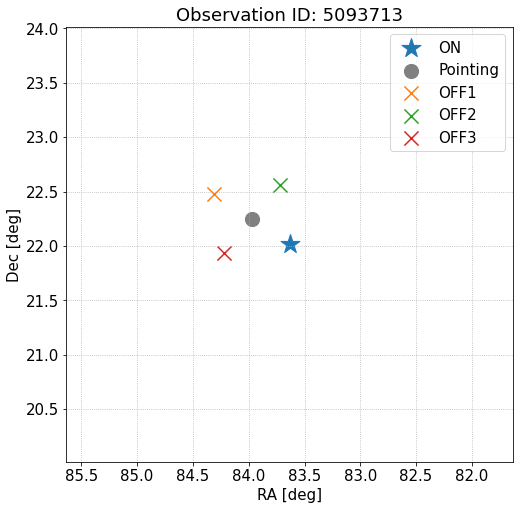

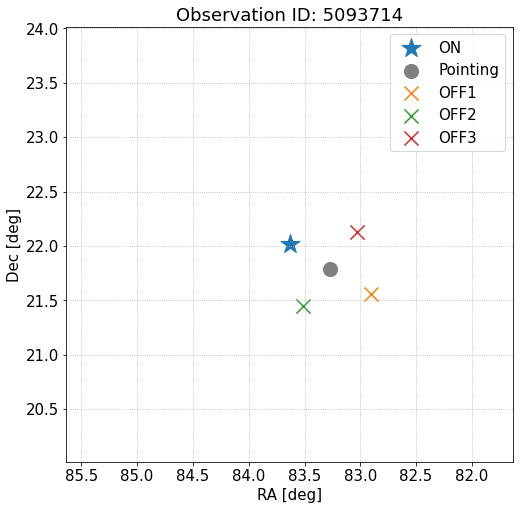

In [8]:
# ================
# === Settings ===
# ================

source_name = 'Crab'
n_off_regions = 3

# ============
# === Main ===
# ============

on_coord = SkyCoord.from_name(source_name)
on_coord = on_coord.transform_to('icrs')

xlim = [on_coord.ra.value + 2, on_coord.ra.value - 2]
ylim = [on_coord.dec.value - 2, on_coord.dec.value + 2]

obs_ids = np.unique(dl2_mean.index.get_level_values('obs_id'))

for obs_id in obs_ids:
    
    df = dl2_mean.query(f'obs_id == {obs_id}')
    
    event_coords = SkyCoord(
        u.Quantity(df['reco_ra'].to_numpy(), u.deg),
        u.Quantity(df['reco_dec'].to_numpy(), u.deg),
        frame='icrs',
    )
    
    tel_coords = SkyCoord(
        u.Quantity(df['pointing_ra'].to_numpy(), u.deg),
        u.Quantity(df['pointing_dec'].to_numpy(), u.deg),
        frame='icrs',
    )

    # Compute the angular distances from ON/OFF regions:
    theta_on, theta_off, off_coords = calculate_angular_distance(on_coord, event_coords, 
                                                                 tel_coords, n_off_regions)
    
    dl2_mean.loc[(obs_id, slice(None)), 'theta2_on'] = theta_on.to(u.deg).value ** 2
    
    for i_off in theta_off.keys():
        dl2_mean.loc[(obs_id, slice(None)), f'theta2_off{i_off}'] = theta_off[i_off].to(u.deg).value ** 2
        
    # Plot the ON/OFF positions:
    plt.figure(figsize=(8, 8))
    plt.title(f'Observation ID: {obs_id}')
    plt.xlabel('RA [deg]')
    plt.ylabel('Dec [deg]')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axis(xlim + ylim)
    plt.grid()

    plt.scatter(
        on_coord.ra.value, on_coord.dec.value,
        label='ON', marker='*', s=400,
    )

    plt.scatter(
        tel_coords.ra.mean().value, tel_coords.dec.mean().value,
        label='Pointing', marker='o', s=200, color='grey',
    )
    
    for i_off in off_coords.keys():

        plt.scatter(
            off_coords[i_off].ra.value, off_coords[i_off].dec.value, 
            label=f'OFF{i_off}', marker='x', s=200, color=colors[i_off],
        )
    
    plt.legend()
    

# Check a signal from the source

### Get an event list surviving cuts:

In [9]:
# ================
# === Settings ===
# ================

combo_types = [0]
global_gam_cut = 0.8

# ============
# === Main ===
# ============

event_list = dl2_mean.query(f'(combo_type == {combo_types}) & (gammaness > {global_gam_cut})').copy()

print(f'Combination types: {combo_types}')
print(f'Global gammaness cut: {global_gam_cut}')
print(f'\n--> Number of events: {len(event_list)}')

Combination types: [0]
Global gammaness cut: 0.8

--> Number of events: 11803


In [10]:
event_list.head()

combo_type  multiplicity  gammaness  reco_energy   reco_alt  \
obs_id  event_id                                                                
5093713 2500             0.0           2.0   0.865500     0.225834  46.933695   
        2559             0.0           2.0   0.951667     0.221439  46.406454   
        2574             0.0           2.0   0.917917     0.270397  47.861456   
        2585             0.0           2.0   0.834167     0.481685  46.838835   
        2600             0.0           2.0   0.962500     0.205643  46.288432   

                    reco_az  pointing_alt  pointing_az    reco_ra   reco_dec  \
obs_id  event_id                                                               
5093713 2500      86.174059      0.817079     1.524160  84.123482  23.033839   
        2559      89.151130      0.817104     1.524169  83.944112  20.930835   
        2574      86.133691      0.817109     1.524171  83.172749  23.342988   
        2585      86.264932      0.817114     1.524172  84.202145  22.945439   
        2600      85.957167      0.817121     1.524175  84.842021  22.975786   

                  pointing_ra  pointing_dec     timestamp  theta2_on  \
obs_id  event_id                                                       
5093713 2500        83.976131     22.247887  1.608069e+09   1.244244   
        2559        83.975635     22.248015  1.608069e+09   1.258103   
        2574        83.975540     22.248040  1.608069e+09   1.945273   
        2585        83.975457     22.248061  1.608069e+09   1.143125   
        2600        83.975322     22.248096  1.608069e+09   2.171602   

                  theta2_off1  theta2_off2  theta2_off3  
obs_id  event_id                                         
5093713 2500         0.339637     0.365098     1.219731  
        2559         2.504027     2.690008     1.070336  
        2574         1.845122     0.870597     2.922126  
        2585         0.229442     0.348071     1.025244  
        2600         0.491309     1.245259     1.417809

### Check the count map:

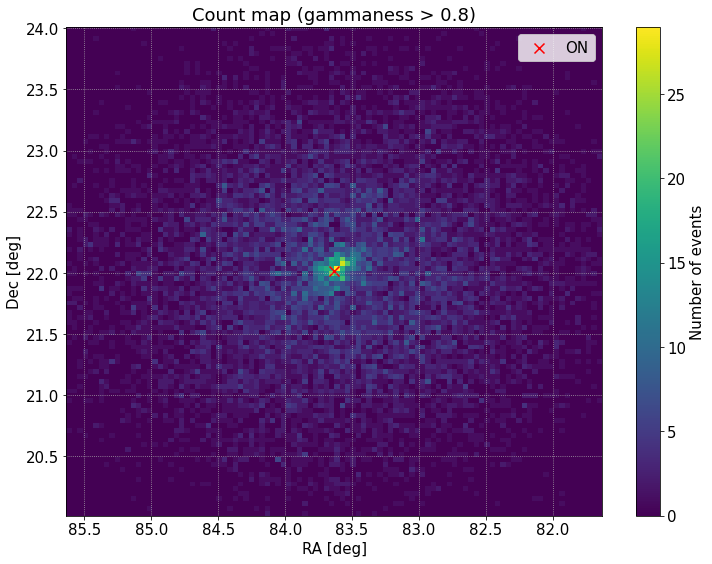

In [11]:
plt.figure()
plt.title(f'Count map (gammaness > {global_gam_cut})')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.xlim(xlim)
plt.ylim(ylim)

plt.hist2d(
    event_list['reco_ra'].to_numpy(), event_list['reco_dec'].to_numpy(),
    bins=[np.linspace(xlim[1], xlim[0], 101), np.linspace(ylim[0], ylim[1], 101)],
)

plt.colorbar(label='Number of events')
plt.axis(xlim+ylim)
plt.grid()

plt.scatter(
    on_coord.ra.value, on_coord.dec.value, 
    marker='x', s=100, color='red', label='ON',
)

plt.legend()

### Check the theta2 distributions and significance:

Global theta2 cut: 0.04 [deg2]

Non: 877
Noff1: 393
Noff2: 389
Noff3: 348
--> Total Noff: 1130 (alpha = 0.333)
--> Scaled Noff: 377

Nexcess: 500
Observation time: 29.42 [min]
Excess rate: 17.00 [1/min]

Li&Ma significance: 18.2 sigma


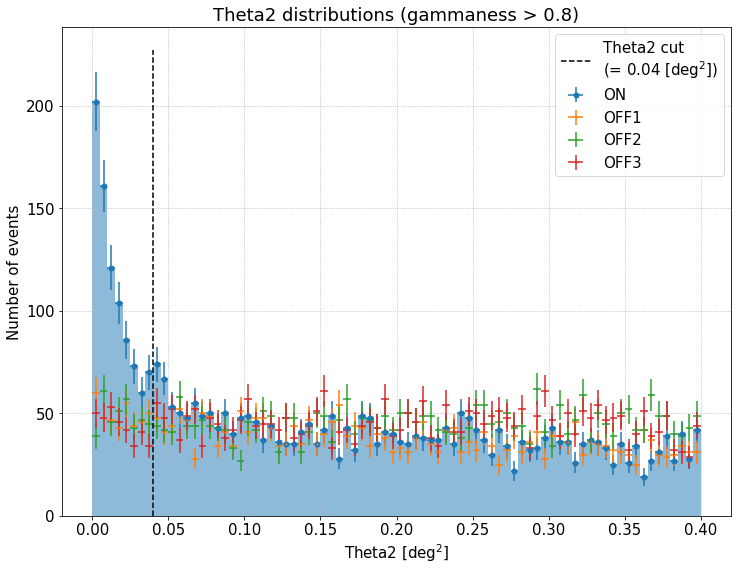

In [12]:
# ================
# === Settings ===
# ================

theta2_bins = np.linspace(0, 0.4, 81)
global_theta2_cut = 0.04   # unit: [deg]

# ============
# === Main ===
# ============

plt.figure()
plt.title(f'Theta2 distributions (gammaness > {global_gam_cut})')
plt.xlabel('Theta2 [deg$^2$]')
plt.ylabel('Number of events')
plt.grid()

theta2_bins_center = (theta2_bins[:-1] + theta2_bins[1:]) / 2
theta2_bins_width = [theta2_bins_center - theta2_bins[:-1], theta2_bins[1:] - theta2_bins_center]

# Theta2 from the ON region:
hist_on = plt.hist(
    event_list['theta2_on'].to_numpy(), bins=theta2_bins,
    histtype='bar', linewidth=2, alpha=0.5,
)[0]

plt.errorbar(
    x=theta2_bins_center, y=hist_on,
    xerr=theta2_bins_width, yerr=np.sqrt(hist_on), 
    fmt='o', markersize=5, label='ON', color=colors[0],
)

# Theta2 from the OFF regions:
for i_off in range(n_off_regions):
    
    hist_off, _ = np.histogram(event_list[f'theta2_off{i_off+1}'].to_numpy(), bins=theta2_bins)
    
    plt.errorbar(
        x=theta2_bins_center, y=hist_off,
        xerr=theta2_bins_width, yerr=np.sqrt(hist_off), 
        fmt='o', markersize=1, label=f'OFF{i_off+1}',
    )
    
plt.plot(
    (global_theta2_cut, global_theta2_cut), (0, plt.ylim()[1]), 
    linestyle='--', color='black',
    label=f'Theta2 cut\n(= {global_theta2_cut} [deg$^2$])',
)

# Compute the significance:
print(f'Global theta2 cut: {global_theta2_cut} [deg2]')

n_on = len(event_list.query(f'theta2_on < {global_theta2_cut}'))
print(f'\nNon: {n_on}')

n_off_total = 0

for i_off in range(n_off_regions):
    
    n_off = len(event_list.query(f'theta2_off{i_off+1} < {global_theta2_cut}'))
    print(f'Noff{i_off+1}: {n_off}')
    
    n_off_total += n_off

alpha = 1 / n_off_regions

print(f'--> Total Noff: {n_off_total} (alpha = {alpha:.3f})')
print(f'--> Scaled Noff: {n_off_total*alpha:.0f}')

n_excess = n_on - alpha * n_off_total
excess_rate = n_excess / obs_time.to(u.min)

print(f'\nNexcess: {n_excess:.0f}')
print(f'Observation time: {obs_time.to(u.min).value:.2f} [min]')
print(f'Excess rate: {excess_rate.value:.2f} [1/min]')

stat = WStatCountsStatistic(n_on, n_off_total, alpha=alpha)
significance = stat.sqrt_ts

print(f'\nLi&Ma significance: {significance:.1f} sigma')

plt.legend(loc='upper right')

### Check the theta2 distributions with different energy bins:

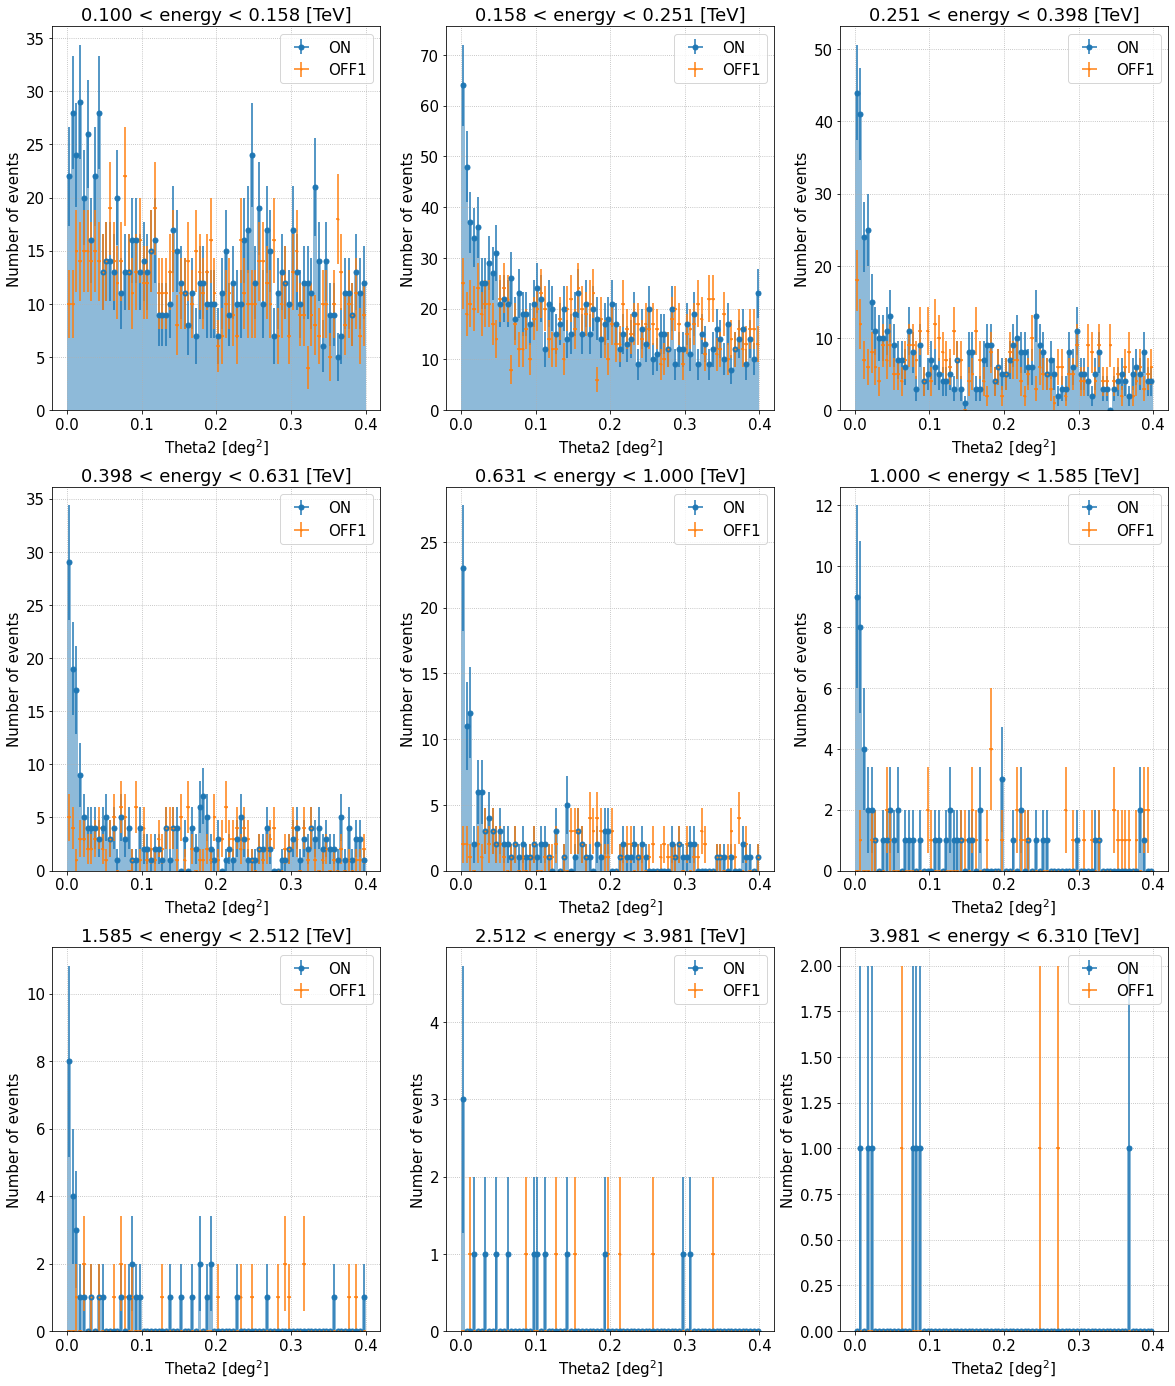

In [13]:
# ================
# === Settings ===
# ================

energy_bins = np.logspace(-1, 1, 11)[:-1]

# ============
# === Main ===
# ============

n_columns = 3
n_rows = int(np.ceil(len(energy_bins[:-1])/n_columns))

grid = (n_rows, n_columns)
locs = list(itertools.product(range(n_rows), range(n_columns)))

plt.figure(figsize=(20, n_rows*8))

for i_bin, (eng_lo, eng_hi) in enumerate(zip(energy_bins[:-1], energy_bins[1:])):
    
    plt.subplot2grid(grid, locs[i_bin])
    plt.title(f'{eng_lo:.3f} < energy < {eng_hi:.3f} [TeV]')
    plt.xlabel('Theta2 [deg$^2$]')
    plt.ylabel('Number of events')
    plt.grid()
    
    df = event_list.query(f'(reco_energy > {eng_lo}) & (reco_energy < {eng_hi})').copy()

    if len(df) > 0:

        hist_on = plt.hist(
            df['theta2_on'].to_numpy(), bins=theta2_bins,
            histtype='bar', linewidth=2, alpha=0.5,
        )[0]

        plt.errorbar(
            x=theta2_bins_center, y=hist_on,
            xerr=theta2_bins_width, yerr=np.sqrt(hist_on), 
            fmt='o', markersize=5, label='ON', color=colors[0],
        )

        hist_off, _ = np.histogram(df['theta2_off1'].to_numpy(), bins=theta2_bins)

        plt.errorbar(
            x=theta2_bins_center, y=hist_off,
            xerr=theta2_bins_width, yerr=np.sqrt(hist_off), 
            fmt='o', markersize=1, label=f'OFF1',
        )

        plt.legend(loc='upper right')
